# Small examples of bimodule approximation.
This notebook provide a few examples of simple bimodule with explainations. <br>
Note that "in a real usecase", simplextrees are generated by datasets and are much bigger than these ones.

## Setup

If you haven't installed the python library, you can compile it and install if via pip using the following command :


In [5]:
# !pip install --user src/

In [6]:
import matplotlib.pyplot as plt		# plots for python
import mma							# python bindings of module approximation c++ functions.

## Small examples

### Toy example

Generates a small simplicial complex. <br> 
Here we have two points : $0$ and $1$, appearing at time $(0,1)$ and $(1,0)$ respectively 

In [7]:
simplextree = mma.SimplexTreeMulti()
simplextree.insert([0], [0,1])
simplextree.insert([1], [1,0])

True

We compute the 0-Homology of this bi-filtration, i.e., the lifetime of these two points. Here point is "alive" at a point $x\in \mathbb R^2$ if this point appeared before $x$.
- The point $0$ lives on $\{ x \in \mathbb R^2, x\ge (0,1)\}$ : the **red** zone,
- The point $1$ lives on $\{ x \in \mathbb R^2, x\ge (1,0)\}$ : the **yellow** zone
- The points $0$ and $1$ both live at the same time if the two rectangles overlap : the **red + yellow** zone

/Users/dloiseau/micromamba/envs/python/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


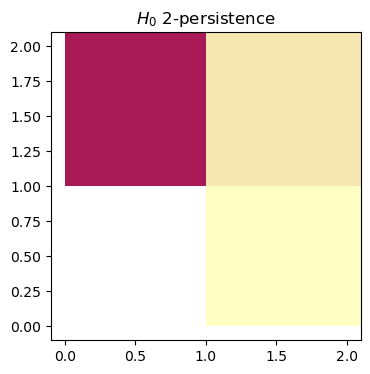

In [9]:
mod = simplextree.persistence_approximation(box=[[-0.1,-0.1],[2.1,2.1]])			# computes the Homology of this 2-filration
mod.plot(alpha=0.9) 											# Plots the result. alpha is a transparancy parameter

We can compute its fibered barcode using the `barcodes` method. For the moment, the python interfaces only diagonal lines. This creates a structure `PyMultiDiagrams` that holds the barcodes.

/var/folders/qq/wykj3rzn6r7_07fh4q0j9frh0000gp/T/ipykernel_91392/1972034382.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bcs.plot()


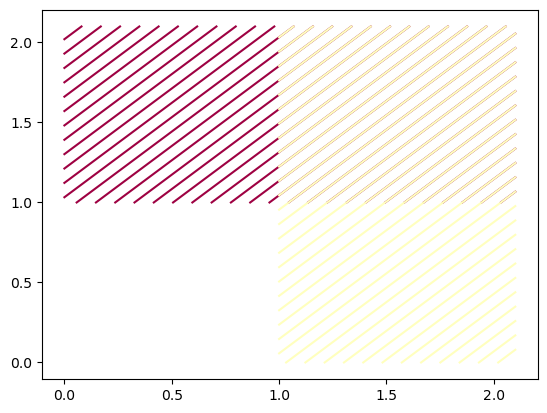

In [10]:
bcs = mod.barcodes(degree=0, threshold=1, num=50)
bcs.plot()

**What happens now** if we try to connect the two points with the segment $[0,1]$ ?

In [11]:
simplextree.insert([0,1], [1,1]) # the segment [0,1] can only appear if [0] and [1] already appeared (at [1,1]) !

True

This segment can only appear if the two points already exists in the filtration. 

/Users/dloiseau/micromamba/envs/python/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


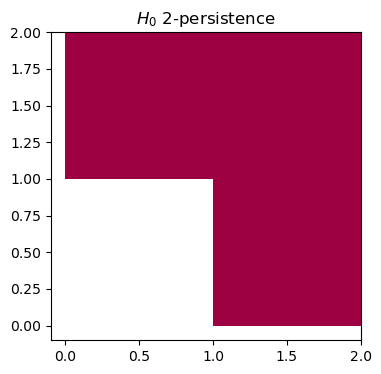

In [13]:
simplextree.persistence_approximation(box=[[-0.1,-0.1],[2,2]]).plot()

The colors have merged. Why ? That's because at time $(1,1)$ the segment $[0,1]$ connects the points $0$ and $1$; thus they are "the same in homology".

Now, what happens if we connect these 2 points *later* ?? Let's push the birth time of the segment $[0,1]$ to $(1.5,1.5)$ for example, and see.

In [17]:
simplextree.assign_filtration([0,1], [1.5,1.5])

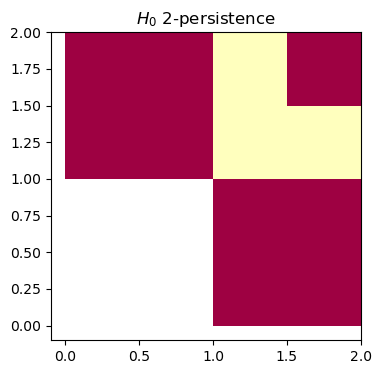

In [18]:
simplextree.persistence_approximation(box=[[-0.1,-0.1],[2,2]]).plot()

How to interpret this image :
- the points $0$ and $1$ are still connected (thus of the same color) as the segment $[0,1]$ still appears at $(1.5,1.5)$
- between time $(1,1)$ and time $(1.5,1.5)$ the points $0$ and the point $1$ are different, thus, we have an excess of one dimension, symbolized by the color yellow (above the red shape).

**Remark :** Although this is still the lifetime of a unique connected component (i.e. the module is indecomposable), this object can be of dimension 2 ! In that case we say that this is **not** an interval module.

### (Sometimes) More than the rank invariant !

The previous examples provides us two disctincts modules that have the same rank invariant :)

/Users/dloiseau/micromamba/envs/python/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


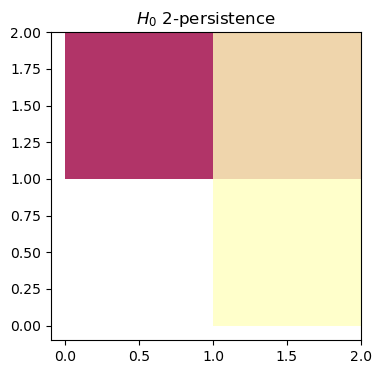

In [20]:
simplextree = mma.SimplexTreeMulti()
simplextree.insert([0], [0,1])
simplextree.insert([1], [1,0])
simplextree.persistence_approximation().plot(box=[[-0.1,-0.1],[2,2]], alpha = 0.8)

/Users/dloiseau/micromamba/envs/python/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


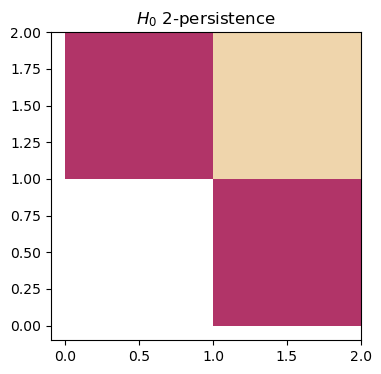

In [22]:
simplextree = mma.SimplexTreeMulti()
simplextree.insert([0], [0,1])
simplextree.insert([1], [1,0])
simplextree.insert([0,1], [1,1])
simplextree.insert([2], [1,1])
simplextree.persistence_approximation().plot(box=[[-0.1,-0.1],[2,2]], alpha = 0.8)

## Another non-(interval-decomposable) module.
Even if the module is **not** interval-decomposable, the algorithm will still return a persistence module, but we don't have a theorical result on its closeness (for instance wrt the interleaving distance) to the real module. <br>
We consider the follwing chain complex.

In [24]:
#         1
#       / * \
#      / *** \
#     / ***** \
#   0 -------- 2
#     \       /
#      \     /
#       \   /
#         3   
simplextree = mma.SimplexTreeMulti()
simplextree.insert([0,1,2], [0,0])
simplextree.insert([0,3], [0,0])
simplextree.insert([2,3], [0,0])

True

And we assign filtration values to the simplices

In [25]:
simplextree.assign_filtration([0,1], [0,1])
simplextree.assign_filtration([1,2], [0,1])
simplextree.assign_filtration([0,2],[1,0])
simplextree.assign_filtration([0,1,2], [2,1])

And we retrieve its persistence

/Users/dloiseau/micromamba/envs/python/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


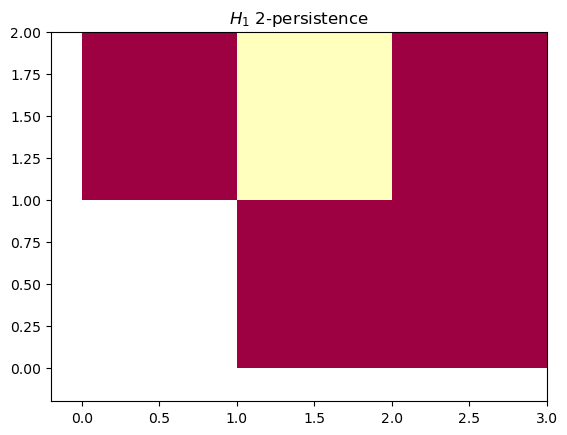

In [26]:
module = simplextree.persistence_approximation()
module.plot(degree=1, box = [[-0.2,-0.2],[3,2]])

## Module approximation versus precision

### Band example

As above, we generate a 2-persistence module, and compute an approximation.

In [27]:
# 0---1---2
simplextree = mma.SimplexTreeMulti()
simplextree.insert([0,1], [2,0])
simplextree.insert([1,2], [2,0])

simplextree.assign_filtration([0],[0,0])
simplextree.assign_filtration([1],[2,0])
simplextree.assign_filtration([2],[1,0])

We will enforce a large precision value here (thus low quality approximation), to retrieve a "bad" module.

/Users/dloiseau/micromamba/envs/python/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


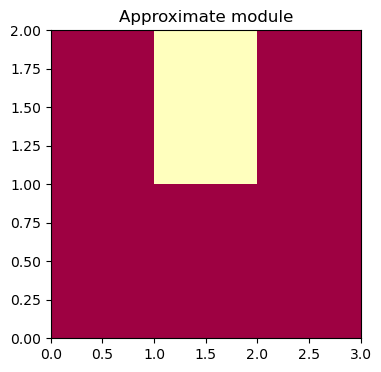

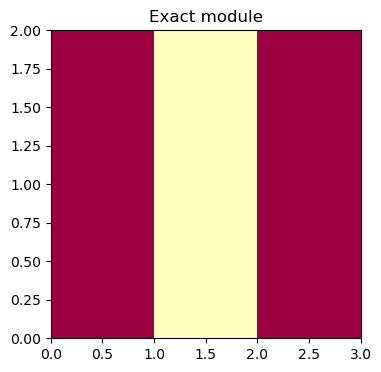

In [29]:
box = [[0,0],[3,2]]
approx_mod = simplextree.persistence_approximation(max_error=2)
exact_mod = simplextree.persistence_approximation() # Not always exact, but the defaults values ensures that it is in that context.
approx_mod.plot(box=box)
plt.title("Approximate module")
exact_mod.plot(box=box)
plt.title("Exact module");